In [ ]:
!pip install seaborn==0.11

     |████████████████████████████████| 283 kB 1.3 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.1
    Uninstalling seaborn-0.11.1:
      Successfully uninstalled seaborn-0.11.1


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [ ]:
train = pd.read_csv('/kaggle/input/tabular-playground-series-mar-2021/train.csv')
test = pd.read_csv('/kaggle/input/tabular-playground-series-mar-2021/test.csv')

train.describe()

,id,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,250183.425697,0.504749,0.494073,0.516632,0.474235,0.504848,0.502257,0.488229,0.501739,0.488074,0.469496,0.508230,0.264870
std,144320.334812,0.206788,0.213037,0.214851,0.216636,0.227474,0.241243,0.211335,0.203496,0.179048,0.194516,0.203393,0.441265
min,0.000000,-0.049562,0.084480,0.094493,-0.045316,0.168071,-0.036379,0.005199,0.090901,0.024139,0.214866,0.097789,0.000000
25%,125399.750000,0.344985,0.317363,0.326047,0.292249,0.279303,0.276442,0.323914,0.353054,0.358915,0.309934,0.368312,0.000000
50%,250192.500000,0.479650,0.463170,0.471247,0.387564,0.479858,0.554768,0.518089,0.435404,0.410908,0.407477,0.446576,0.000000
75%,375246.250000,0.637657,0.693992,0.704625,0.644950,0.725779,0.735225,0.608537,0.642023,0.612725,0.586793,0.581957,1.000000
max,499999.000000,1.004559,1.009958,1.016600,0.952187,0.858578,0.853022,0.966553,1.035818,1.055885,1.005652,1.011331,1.000000


In [ ]:
train.describe(include='O')

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18
count,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000
unique,2,15,19,13,20,84,16,51,61,19,299,2,2,2,2,4,4,4,4
top,A,I,A,A,E,BI,A,AH,BM,A,DJ,A,A,A,A,B,D,D,B
freq,223525,90809,168694,187251,129385,238563,187896,45818,42380,201945,31584,258932,257139,292712,160166,203574,206906,247125,255482


## Target Distribution

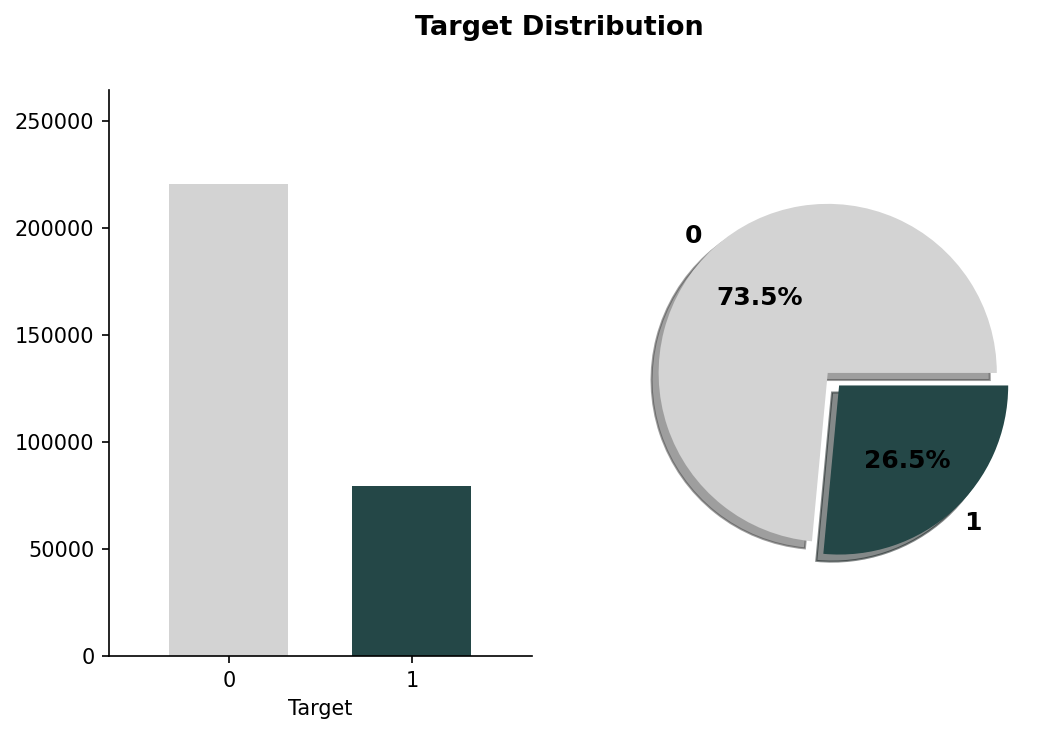

In [ ]:
target_count = train['target'].value_counts()


fig, axes = plt.subplots(1, 2, figsize=(8, 5), dpi=150)


color = ['lightgray', '#244747']  # To express the meaning of survival
new_xlabel = list(map(str, target_count.index))

# Axes[0] : Bar Plot Custom
axes[0].bar(new_xlabel, # redefine for categorical x labels
            target_count,
            color=color,# color
            width=0.65, # bar width
        )

axes[0].margins(0.2, 0.2) # margin control (leftright, topbottom)
axes[0].set_xlabel('Target') # label info
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)


# Axes[0] : Pie Chart Custom
explode = [0, 0.1]

axes[1].pie(target_count,
            labels=new_xlabel,
            colors=color, # color
            explode=explode, # explode
            textprops={'fontsize': 12, 'fontweight': 'bold'}, # text setting
            autopct='%1.1f%%', # notation
            shadow=True # shadow
           )

fig.suptitle('Target Distribution', fontsize=13, fontweight='bold')

plt.show()

## Categorical Feature Distribution

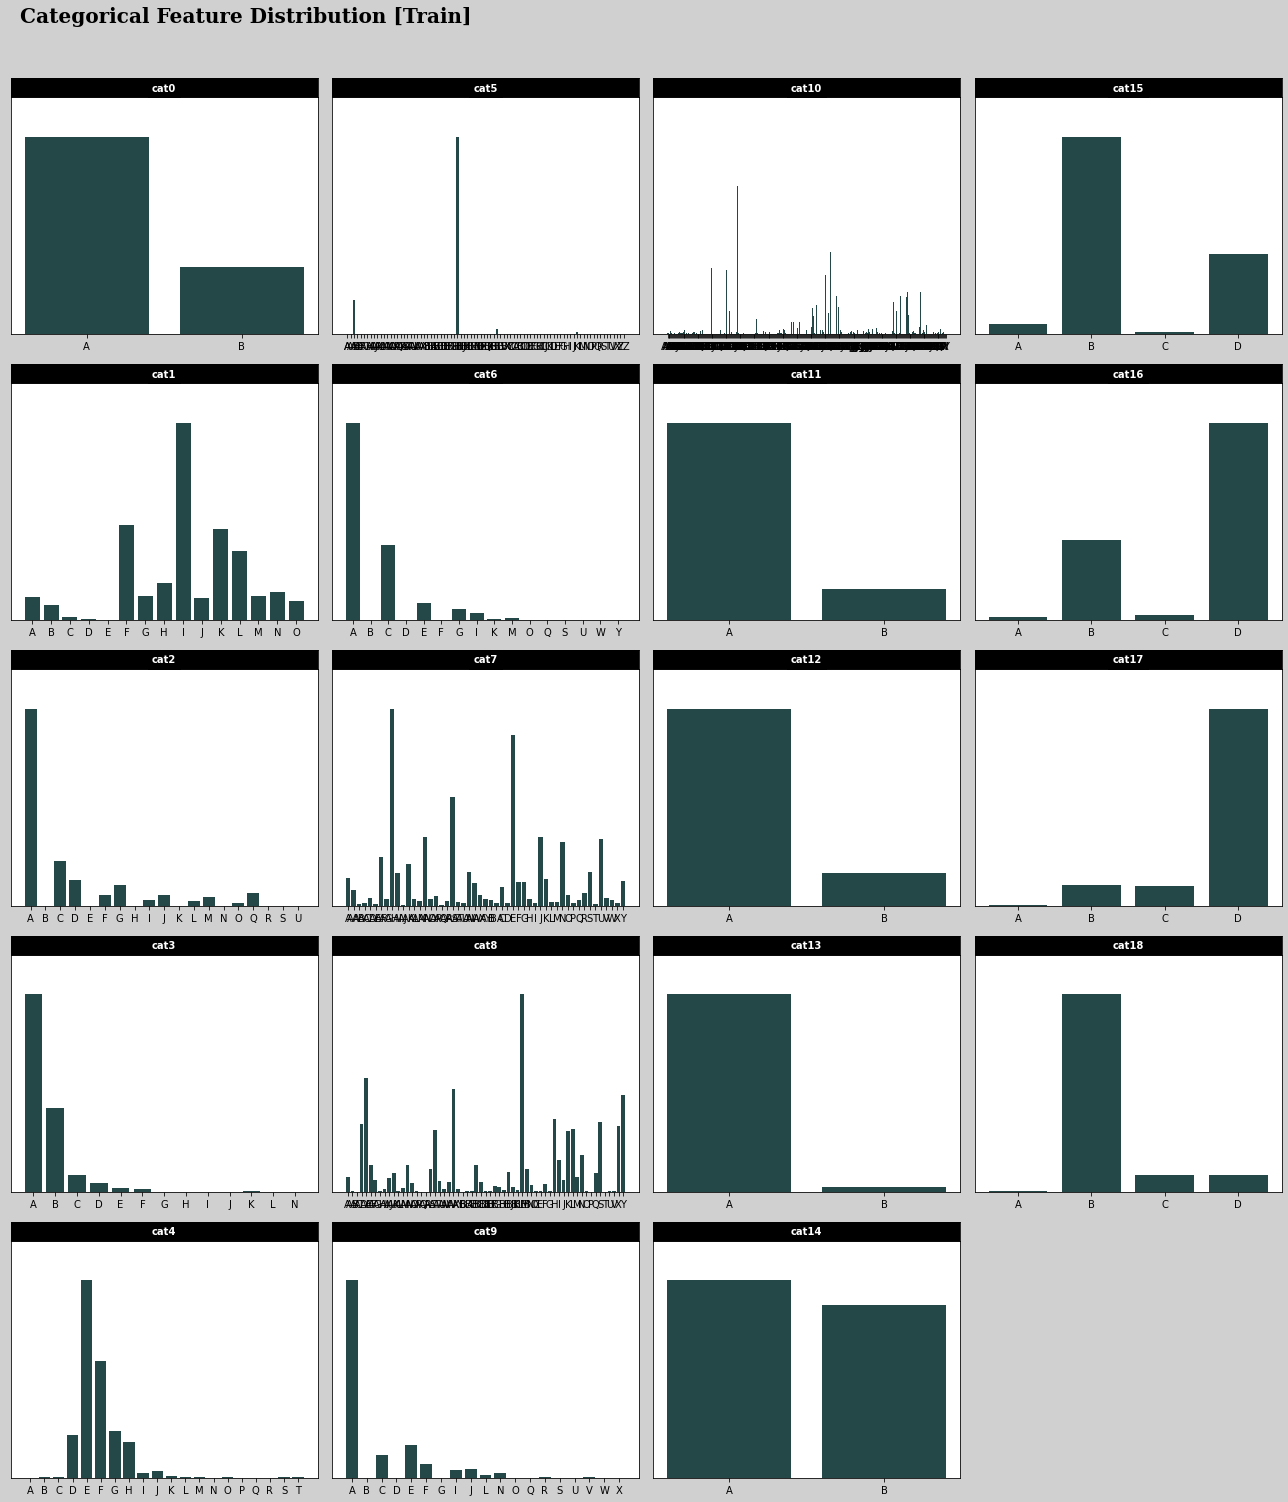

In [ ]:
fig, ax = plt.subplots(5, 4, figsize=(18, 20))
fig.set_facecolor('#d0d0d0')

for i in range(19):
    # count
    cnt_tmp = train[f'cat{i}'].value_counts().sort_index()
    ax[i%5][i//5].bar(cnt_tmp.index, cnt_tmp, color='#244747', label='Count')
    ax[i%5][i//5].set_yticks([])
    ax[i%5][i//5].margins(0.05, 0.2)

    divider = make_axes_locatable(ax[i%5][i//5])
    cax = divider.append_axes("top", size="8%", pad=0)
    cax.get_xaxis().set_visible(False)
    cax.get_yaxis().set_visible(False)
    cax.set_facecolor('black')

    at = AnchoredText(f'cat{i}', loc=10,
                      prop=dict(backgroundcolor='black',
                                size=10, color='white', weight='bold'))
    cax.add_artist(at)

ax[-1][-1].set_visible(False)
fig.text(0.018, 1.03, 'Categorical Feature Distribution [Train]', fontsize=20, fontweight='bold', fontfamily='serif')


plt.tight_layout()
plt.show()

In [ ]:
for feat in ['cat5','cat7', 'cat8', 'cat10']:
    print('=================')
    print(feat)
    print(f'Total {len(train[feat].unique())}')
    print(train[feat].value_counts().sort_index().index)

    print('\n')

cat5
Total 84
Index(['A', 'AA', 'AB', 'AE', 'AF', 'AG', 'AH', 'AI', 'AJ', 'AK', 'AL', 'AM',
       'AN', 'AO', 'AP', 'AQ', 'AR', 'AS', 'AT', 'AU', 'AV', 'AW', 'AX', 'AY',
       'B', 'BA', 'BB', 'BC', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BK',
       'BL', 'BM', 'BN', 'BO', 'BP', 'BQ', 'BR', 'BS', 'BT', 'BU', 'BV', 'BX',
       'BY', 'C', 'CA', 'CB', 'CC', 'CD', 'CE', 'CF', 'CG', 'CH', 'CI', 'CJ',
       'CK', 'CL', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O',
       'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'X', 'Y', 'ZZ'],
      dtype='object')


cat7
Total 51
Index(['A', 'AA', 'AB', 'AC', 'AD', 'AE', 'AF', 'AG', 'AH', 'AI', 'AJ', 'AK',
       'AL', 'AM', 'AN', 'AO', 'AP', 'AQ', 'AR', 'AS', 'AT', 'AU', 'AV', 'AW',
       'AX', 'AY', 'B', 'BA', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L',
       'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y'],
      dtype='object')


cat8
Total 61
Index(['A', 'AB', 'AC', 'AD', 'AE', 'AF', 'AG', 'AH', 'AI', 'AJ', 'AK'

In [ ]:
# fig, ax = plt.subplots(5, 4, figsize=(18, 20))
# fig.set_facecolor('#d0d0d0')

# for i in range(19):
#     # count
#     cnt_tmp = test[f'cat{i}'].value_counts().sort_index()
#     ax[i%5][i//5].bar(cnt_tmp.index, cnt_tmp, color='#244747', label='Count')
#     ax[i%5][i//5].set_yticks([])
#     ax[i%5][i//5].margins(0.05, 0.2)

#     divider = make_axes_locatable(ax[i%5][i//5])
#     cax = divider.append_axes("top", size="8%", pad=0)
#     cax.get_xaxis().set_visible(False)
#     cax.get_yaxis().set_visible(False)
#     cax.set_facecolor('black')

#     at = AnchoredText(f'cat{i}', loc=10,
#                       prop=dict(backgroundcolor='black',
#                                 size=10, color='white', weight='bold'))
#     cax.add_artist(at)

# ax[-1][-1].set_visible(False)
# fig.text(0.018, 1.03, 'Categorical Feature Distribution [Test]', fontsize=20, fontweight='bold', fontfamily='serif')


# plt.tight_layout()
# plt.show()

## Continuous Feature Distribution

- gray for negative
- green for positive

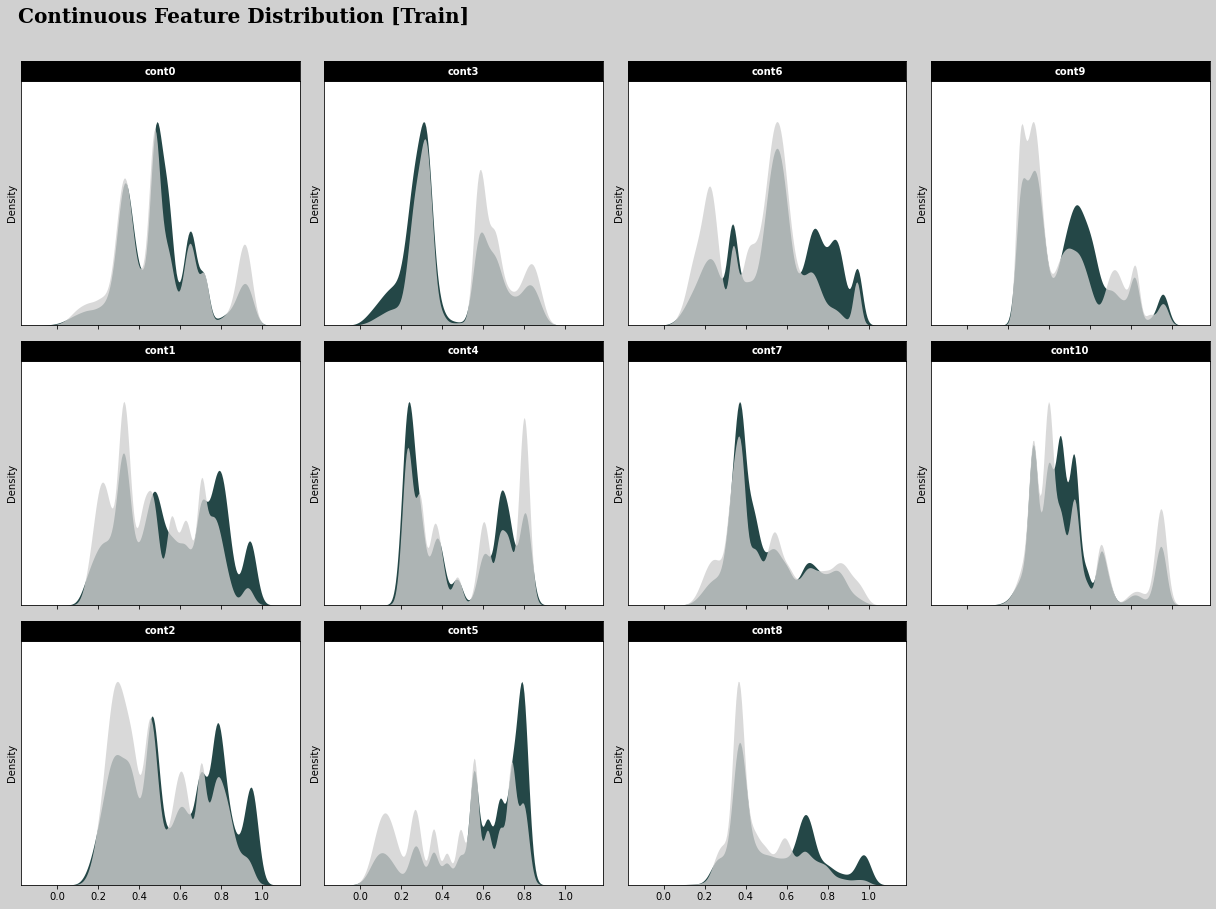

In [ ]:
fig, ax = plt.subplots(3, 4, figsize=(17, 12), sharex=True)
fig.set_facecolor('#d0d0d0')

for i in range(11):
    sns.kdeplot(data=train[train['target']==1], x=f'cont{i}',
                fill=True,
                linewidth=0,
                color='#244747', alpha=1,
                ax=ax[i%3][i//3])

    sns.kdeplot(data=train[train['target']==0], x=f'cont{i}',
                fill=True,
                linewidth=0,
                color='#d0d0d0', alpha=0.8,
                ax=ax[i%3][i//3])

    ax[i%3][i//3].set_yticks([])
    ax[i%3][i//3].set_xlabel('',visible=False)
    ax[i%3][i//3].margins(0.05, 0.2)

    # dviider
    divider = make_axes_locatable(ax[i%3][i//3])
    cax = divider.append_axes("top", size="8%", pad=0)
    cax.get_xaxis().set_visible(False)
    cax.get_yaxis().set_visible(False)
    cax.set_facecolor('black')

    at = AnchoredText(f'cont{i}', loc=10,
                      prop=dict(backgroundcolor='black',
                                size=10, color='white', weight='bold'))
    cax.add_artist(at)

ax[-1][-1].set_visible(False)
fig.text(0.018, 1.03, 'Continuous Feature Distribution [Train]', fontsize=20, fontweight='bold', fontfamily='serif')

plt.tight_layout()
plt.show()

In [ ]:
# fig, ax = plt.subplots(3, 4, figsize=(17, 12), sharex=True)
# fig.set_facecolor('#d0d0d0')

# for i in range(11):
#     sns.kdeplot(data=test, x=f'cont{i}',
#                 fill=True,
#                 linewidth=0,
#                 color='#244747', alpha=1,
#                 ax=ax[i%3][i//3])
#     ax[i%3][i//3].set_yticks([])
#     ax[i%3][i//3].set_xlabel('',visible=False)
#     ax[i%3][i//3].margins(0.05, 0.2)

#     # dviider
#     divider = make_axes_locatable(ax[i%3][i//3])
#     cax = divider.append_axes("top", size="8%", pad=0)
#     cax.get_xaxis().set_visible(False)
#     cax.get_yaxis().set_visible(False)
#     cax.set_facecolor('black')

#     at = AnchoredText(f'cont{i}', loc=10,
#                       prop=dict(backgroundcolor='black',
#                                 size=10, color='white', weight='bold'))
#     cax.add_artist(at)

# ax[-1][-1].set_visible(False)
# fig.text(0.018, 1.03, 'Continuous Feature Distribution [Test]', fontsize=20, fontweight='bold', fontfamily='serif')

# plt.tight_layout()
# plt.show()

## Correlation between Feature

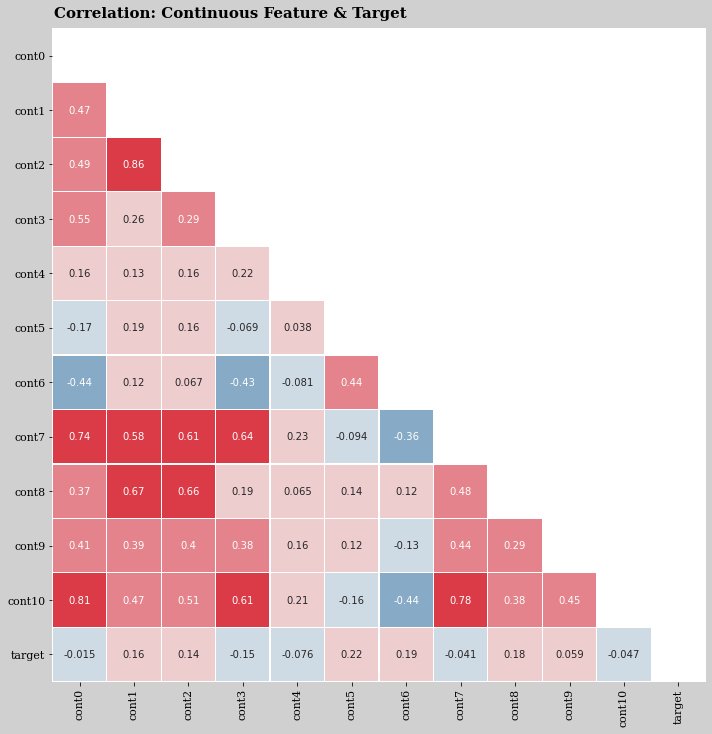

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
fig.set_facecolor('#d0d0d0')
corr = train.drop('id', axis=1).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr,
            square=True,
            linewidth=0.2,
            cbar=False,
            mask=mask,
            annot=True,
            center=0,
            cmap=sns.diverging_palette(240, 10),
            ax=ax)

fig.text(0.075, 1, 'Correlation: Continuous Feature & Target', fontweight='bold', fontfamily='serif', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)
ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
plt.tight_layout()
plt.show()

## Pair Grids

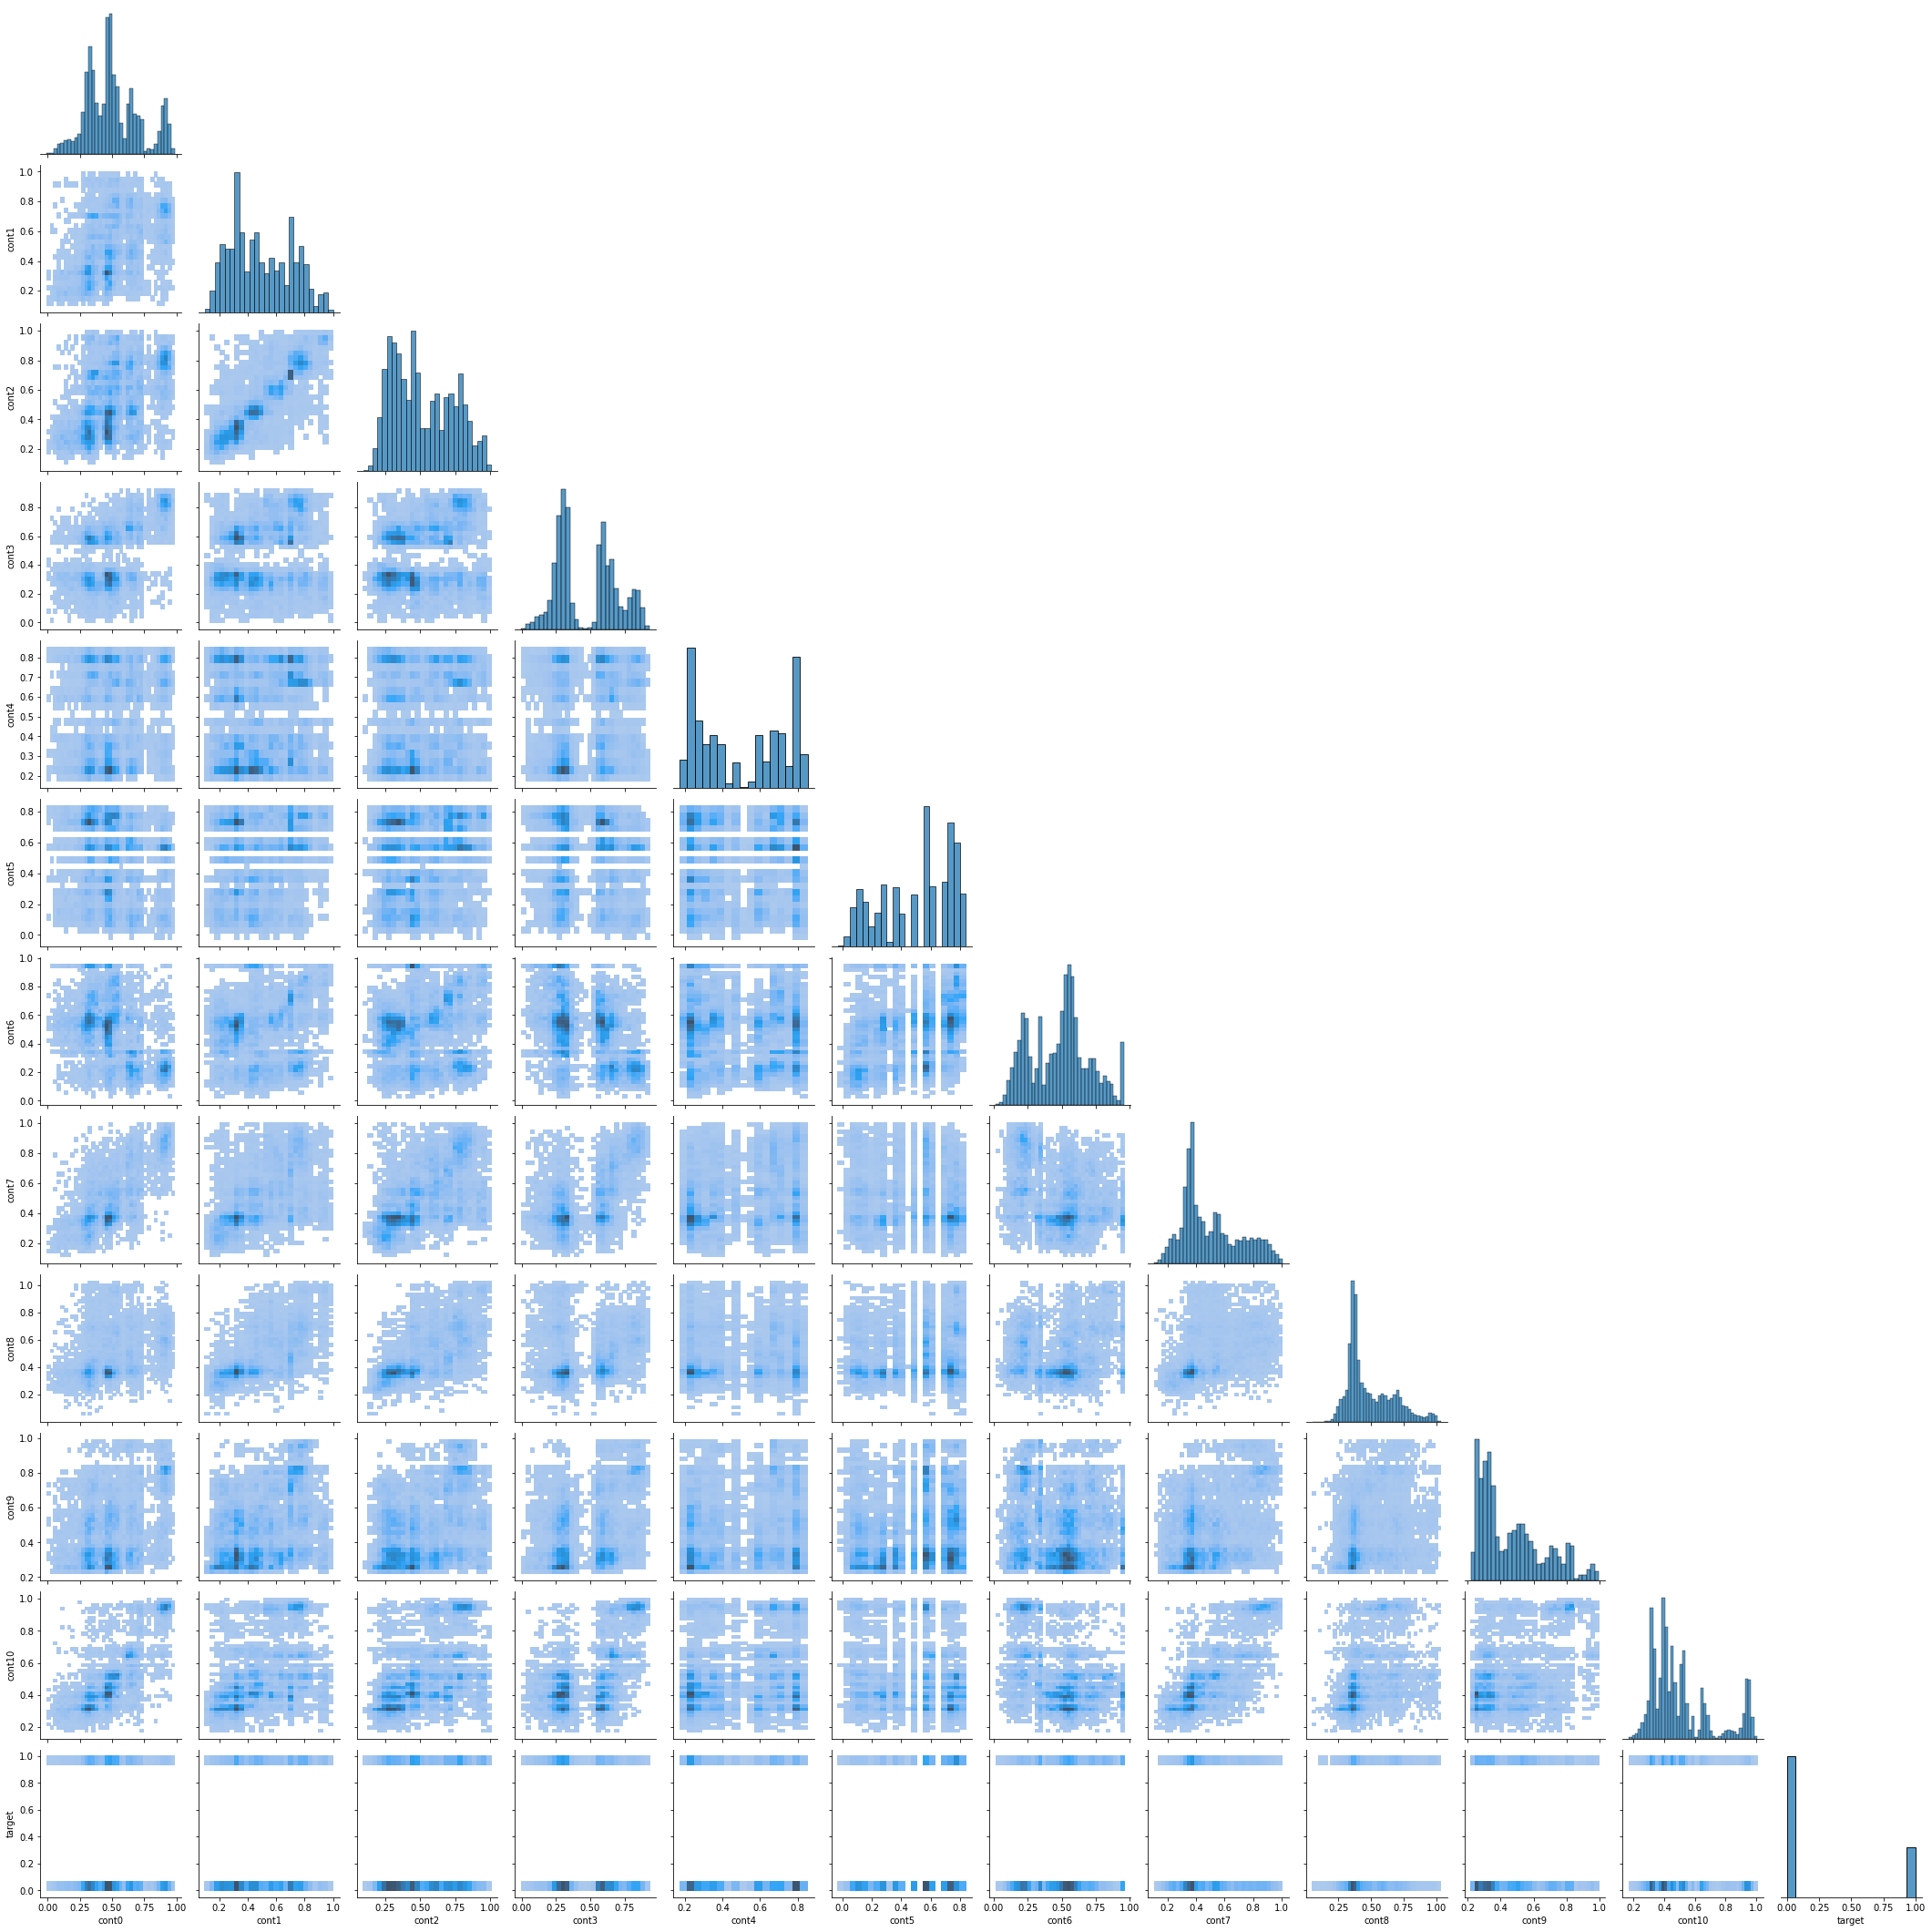

In [ ]:
sns.pairplot(train.iloc[:,11:].sample(10000), kind="hist", corner=True)

## UMAP

Only Use Continuous Feature for Dimension Reduction

In [ ]:
from umap import UMAP

# Dimension Reduction
train_sub = train.sample(30000)
target = train_sub['target']
data_sub = train_sub.drop([col for col in train.columns if 'cat' in col], axis=1)

umap = UMAP(random_state=0)
train_umap = umap.fit_transform(data_sub, target)

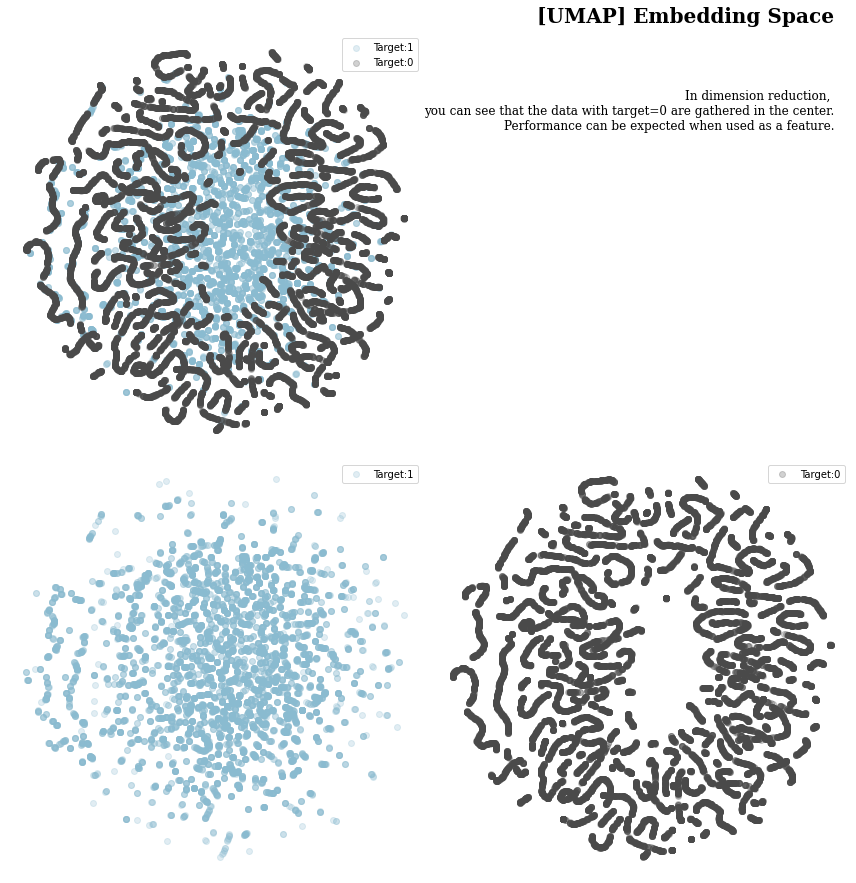

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

ax[0][0].scatter(train_umap[target==1][:,0], train_umap[target==1][:,1], c='#8abbd0', alpha=0.25, label='Target:1')
ax[0][0].scatter(train_umap[target==0][:,0], train_umap[target==0][:,1], c='#4a4a4a', alpha=0.25, label='Target:0')


ax[0][1].set_visible(False)

ax[1][0].scatter(train_umap[target==1][:,0], train_umap[target==1][:,1], c='#8abbd0', alpha=0.25, label='Target:1')
ax[1][1].scatter(train_umap[target==0][:,0], train_umap[target==0][:,1], c='#4a4a4a', alpha=0.25, label='Target:0')

for i in range(2):
    for j in range(2):
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])
        for s in ["top","right","left", 'bottom']:
            ax[i][j].spines[s].set_visible(False)

        ax[i][j].legend()

# Text Part
fig.text(0.97, 1, '[UMAP] Embedding Space', fontweight='bold', fontfamily='serif', fontsize=20, ha='right')

fig.text(0.97, 0.94, '''
In dimension reduction,
you can see that the data with target=0 are gathered in the center.
Performance can be expected when used as a feature.

''',
         fontweight='light', fontfamily='serif', fontsize=12, va='top', ha='right')

plt.tight_layout()
plt.show()


